# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane seem to be more effective at reducing tumor volume compared to Infubinol and Ceftamin. This is evident from the box plot analysis, where the median tumor volume for Capomulin and Ramicane is lower than that of Infubinol and Ceftamin. Additionally, Capomulin and Ramicane have fewer potential outliers compared to Infubinol and Ceftamin, indicating a more consistent response to treatment.

- There is a positive correlation between mouse weight and average tumor volume for mice treated with Capomulin. This suggests that heavier mice may have a harder time responding to the treatment, which could have implications for dosing and treatment strategies.

- There is a clear downward trend in tumor volume over time for the mouse selected for the line plot analysis. This indicates that Capomulin is effective at reducing tumor volume over time in individual mice.
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Print the list of duplicate mice
duplicate_mice['Mouse ID'].unique()


array(['g989'], dtype=object)

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice in the clean DataFrame.

len(clean_data['Mouse ID'].unique())


249

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group the clean data by drug regimen
regimen_grouped = clean_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = regimen_grouped['Tumor Volume (mm3)'].mean()
median_volume = regimen_grouped['Tumor Volume (mm3)'].median()
variance_volume = regimen_grouped['Tumor Volume (mm3)'].var()
std_volume = regimen_grouped['Tumor Volume (mm3)'].std()
sem_volume = regimen_grouped['Tumor Volume (mm3)'].sem()

# Assemble the summary statistics into a single data frame
summary_df = pd.DataFrame({'Mean Tumor Volume': mean_volume,
                           'Median Tumor Volume': median_volume,
                           'Tumor Volume Variance': variance_volume,
                           'Tumor Volume Std. Dev.': std_volume,
                           'Tumor Volume Std. Err.': sem_volume})

# Print the summary statistics data frame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Using the aggregation method, produce the same summary statistics in a single line.

# Calculate the summary statistics for each regimen using the agg() method
summary_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Flatten the multi-index column names
summary_df.columns = [f'{stat[0]} {stat[1]}' for stat in summary_df.columns]

# Print the summary statistics data frame
summary_df



,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) var,Tumor Volume (mm3) std,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

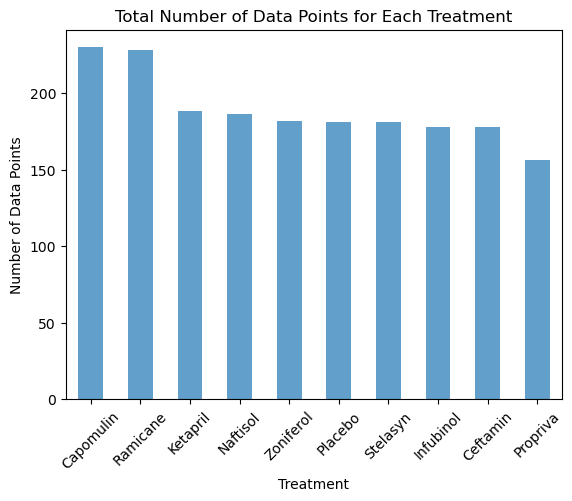

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Count the number of data points for each treatment
treatment_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot of the treatment counts using Pandas
treatment_counts.plot(kind='bar', rot=45, alpha=0.7)

# Set the x-axis and y-axis labels and title
plt.xlabel('Treatment')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Treatment')

# Show the plot
plt.show()


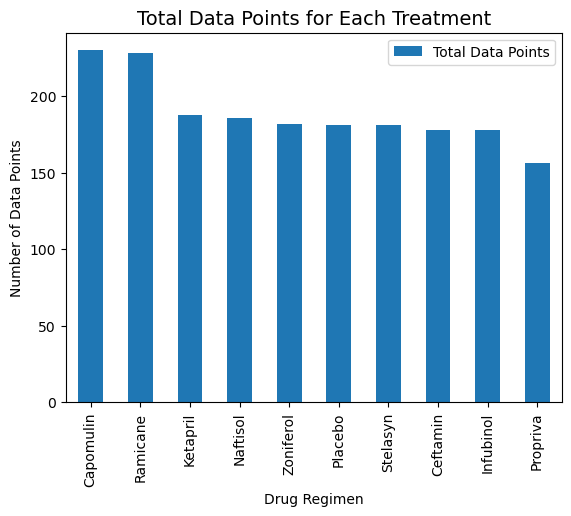

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the clean data frame by drug regimen
regimen_df = clean_data.groupby('Drug Regimen')

# Count the number of data points for each treatment
total_datapoints = regimen_df['Drug Regimen'].count()

# Create a data frame for the total data points
total_datapoints_df = pd.DataFrame(total_datapoints)
total_datapoints_df.columns = ['Total Data Points']

# Sort the data frame by total data points and create a bar plot
total_datapoints_plot = total_datapoints_df.sort_values('Total Data Points', ascending=False).plot(kind='bar')

# Set the x-axis and y-axis labels and title
total_datapoints_plot.set_xlabel('Drug Regimen')
total_datapoints_plot.set_ylabel('Number of Data Points')
plt.title('Total Data Points for Each Treatment', fontsize=14)

# Show the plot
plt.show()



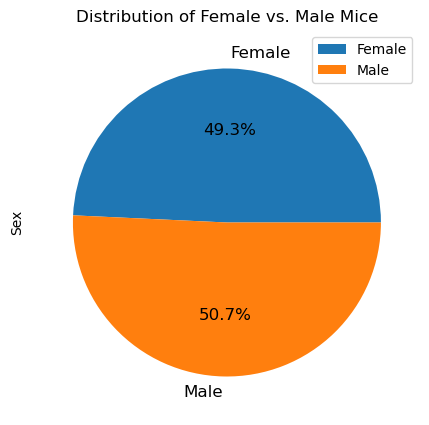

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the merged data frame by sex
gender_df = clean_data.groupby('Sex')

# Count the number of mice for each sex
gender_count = gender_df['Sex'].count()

# Create a pie plot of the sex distribution using Pandas
gender_plot = gender_count.plot(kind='pie', y='Sex', autopct='%1.1f%%', fontsize=12, figsize=(5, 5))

# Set the title and legend
gender_plot.set_title('Distribution of Female vs. Male Mice')
gender_plot.legend(['Female', 'Male'], loc='upper right')

# Show the plot
plt.show()


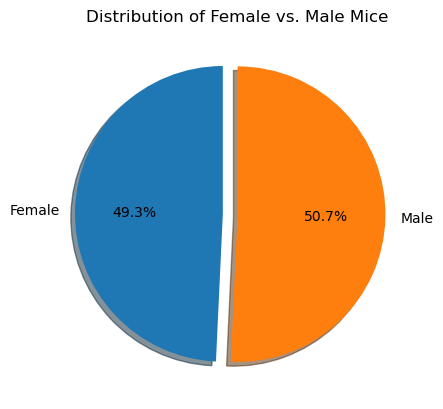

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the clean data by sex and count the number of mice for each sex
sex_counts = clean_data.groupby('Sex').size()

# Create a pie plot of the sex distribution using Pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group the original dataframe by "Mouse ID" and find the maximum "Timepoint" for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()

# Merge the last_timepoint series with the clean_data dataframe to get the tumor volume at the last timepoint for each mouse
last_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"])

# Filter the last_volume dataframe to only include the four treatment regimens we are interested in
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_volume = last_volume[last_volume["Drug Regimen"].isin(treatment_list)]

# Display the resulting dataframe
last_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [77]:
# Put treatments into a list for a loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

# Loop through the list of treatments and calculate tumor volume for each
for i in range(len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatments[i], "Tumor Volume (mm3)"]
    
    # Append the tumor volumes to the appropriate list
    if treatments[i] == "Capomulin":
        tumor_vol_capomulin = tumor_volumes
    elif treatments[i] == "Ramicane":
        tumor_vol_ramicane = tumor_volumes
    elif treatments[i] == "Infubinol":
        tumor_vol_infubinol = tumor_volumes
    else:
        tumor_vol_ceftamin = tumor_volumes
    
    # Determine outliers using upper and lower bounds
    quartiles = np.percentile(tumor_volumes, [25, 50, 75])
    lower_quartile = quartiles[0]
    upper_quartile = quartiles[2]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatments[i]}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


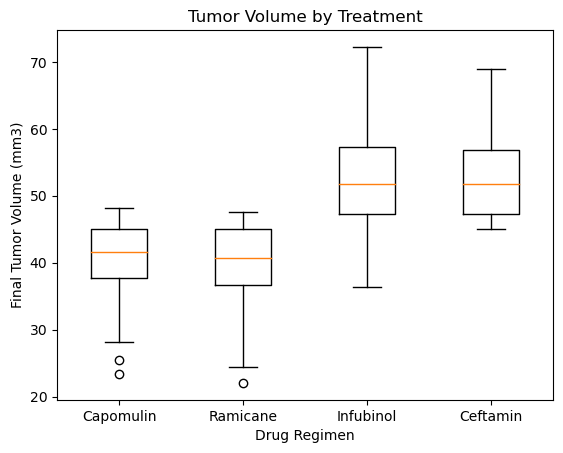

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of tumor volume data for each treatment group
data = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]

# Create a boxplot of the tumor volume data
fig, ax = plt.subplots()
ax.boxplot(data)

# Set the title and axis labels
ax.set_title('Tumor Volume by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Set the x-axis tick labels
x_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ax.set_xticklabels(x_labels)

# Show the plot
plt.show()


## Line and Scatter Plots

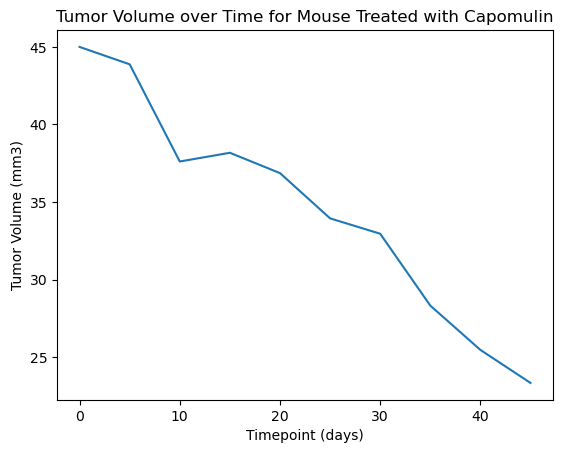

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find a mouse treated with Capomulin
capomulin_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()
mouse_id = capomulin_mice[0] # select the first mouse in the list

# Filter the data to only include the selected mouse
mouse_data = clean_data.loc[clean_data["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Set the x-axis and y-axis labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse Treated with Capomulin")

# Show the plot
plt.show()



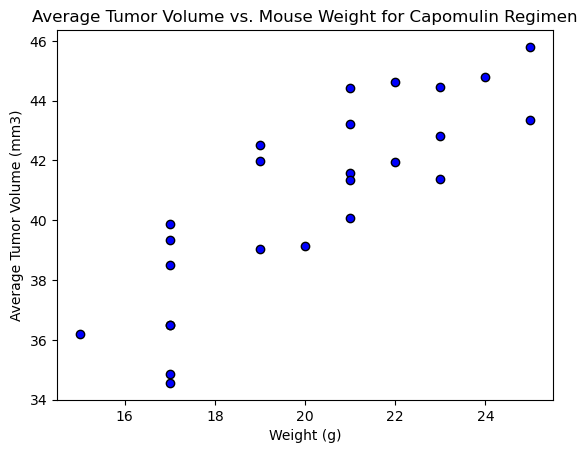

In [80]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black")

# Set x and y axis labels and a title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


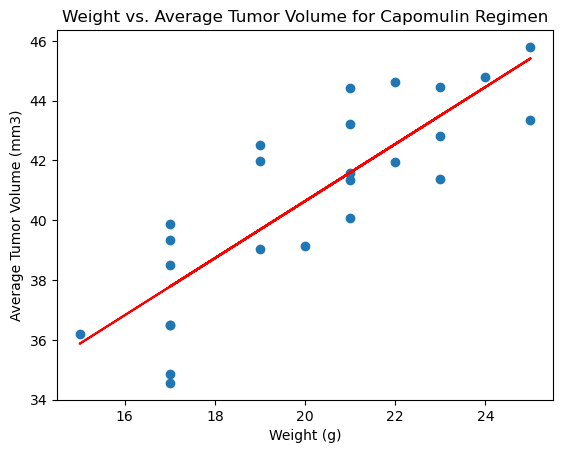

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
weight = capomulin_data.groupby("Mouse ID").mean()["Weight (g)"]

# Create the scatter plot
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume for Capomulin Regimen")

# Calculate the correlation coefficient
correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate and plot the linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
plt.plot(weight, regress_values, "r-")

plt.show()
